## Plot precipitation anomaly time series for Nebraska using NCEI data (Figure 2.10)

### imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

### read data from NCEI

In [2]:
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/pcp/12/9/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

## different baseline (1971-2000)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/5/pcp/12/9/1895-2023.csv?base_prd=true&begbaseyear=1971&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/pcp/12/12/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/12/12/1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/pcp/1/11/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)
#data = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/25/tavg/1/4/1895-2024.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=4)

## pull out just the year (first four digits)
data['Date'] = data['Date'].astype(str).str[0:4].astype(int)
data = data.set_index("Date")

data

,Value,Anomaly
Date,,
1895,0.86,0.01
1896,1.11,0.26
1897,0.49,-0.36
1898,0.59,-0.26
1899,0.84,-0.01
...,...,...
2019,0.96,0.11
2020,0.81,-0.04
2021,0.31,-0.54


### plot anomaly time series with 10-year running mean in the background

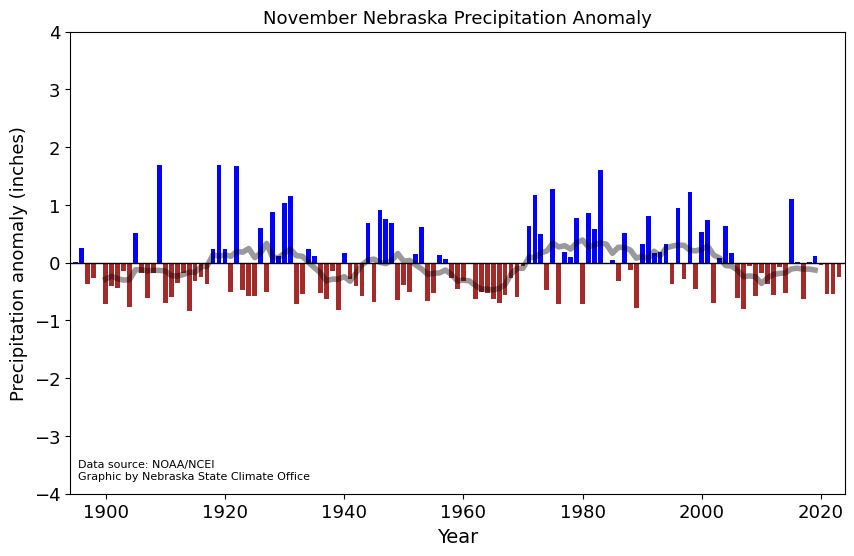

In [3]:

### add 10-year running mean in background
fig, ax = plt.subplots(figsize=(10,6))

clrs = ['brown' if (y <= 0) else 'blue' for y in data['Anomaly'] ]
#clrs = ['blue' if (y <= 0) else 'red' for y in data['Anomaly'] ]

p = plt.bar(data.index, data['Anomaly'], linewidth=3, color=clrs)

plt.xlim(1894,2024)
plt.ylim(-4,4)
plt.xlabel('Year',fontsize=14)

rollmean = data['Anomaly'].rolling(10,center=True).mean()
plt.plot(rollmean,lw=4, alpha=0.4, color='black')

plt.ylabel('Precipitation anomaly (inches)',fontsize=13)
#plt.ylabel('Temperature anomaly (°F)',fontsize=13)
#plt.title('Nebraska statewide precipitation anomaly (inches) by year, with respect to 1971-2000 average',fontsize=13)
#plt.title('Nebraska statewide precipitation anomaly (inches) by year, with respect to 1971-2000 average',fontsize=13)
plt.title('November Nebraska Precipitation Anomaly',fontsize=13)
#plt.title('April Nebraska Temperature Anomaly',fontsize=13)


plt.axhline(0, linewidth=1, color='black')
plt.tick_params(labelsize=13)

plt.text(0.01, 0.05, 'Data source: NOAA/NCEI\nGraphic by Nebraska State Climate Office', 
         horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=8)

plt.show()

fig.savefig('NE_statewide_Panom_Nov2024_runmean.png',dpi=225,facecolor='white',transparent=False,bbox_inches='tight')